## KNN(K-Nearest Neighbors) on Amazon Fine Food Reviews

DataSet Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

In [2]:
#Importing all Necessory Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading Bow data
import pickle
with open('train_bow.pickle','rb') as handle:
    train_bow = pickle.load(handle)
with open('test_bow.pickle','rb') as handle:
    test_bow = pickle.load(handle)

In [4]:
#Loding Tfidf data
import pickle
with open('train_tfidf.pickle','rb') as handle:
    train_tfidf = pickle.load(handle)
with open('test_tfidf.pickle','rb') as handle:
    test_tfidf = pickle.load(handle)

In [5]:
#Loding Avg word2vec
import pickle
with open('train_avg_word2vec.pickle','rb') as handle:
    train_avg_word2vec = pickle.load(handle)
with open('test_avg_word2vec.pickle','rb') as handle:
    test_avg_word2vec = pickle.load(handle)

In [6]:
#Loding Tfidf Word2Vec.
import pickle
with open('train_tfidf_word2vec.pickle','rb') as handle:
    train_tfidf_word2vec = pickle.load(handle)
with open('test_tfidf_word2vec.pickle','rb') as handle:
    test_tfidf_word2vec = pickle.load(handle)

In [7]:
#Loading y components
with open('y_train.pickle','rb') as handle:
    y_train = pickle.load(handle)
with open('y_test.pickle','rb') as handle:
    y_test = pickle.load(handle)

In [8]:
#Loading y components
with open('y_train_w.pickle','rb') as handle:
    y_train_w = pickle.load(handle)
with open('y_test_w.pickle','rb') as handle:
    y_test_w = pickle.load(handle)

In [9]:
from sklearn.preprocessing import normalize
#Normalizing each feature.
#After normalization allthe feature values lies between 0 and 1.
train_bow_normalize = normalize(train_bow, axis=0)
test_bow_normalize = normalize(test_bow, axis=0)

train_tfidf_normalize = normalize(train_tfidf, axis=0)
test_tfidf_normalize = normalize(test_tfidf, axis=0)

train_avgw2v_normalize = normalize(train_avg_word2vec, axis=0)
test_avgw2v_normalize = normalize(test_avg_word2vec, axis=0)

train_tfidfw2v_normalize = normalize(train_tfidf_word2vec, axis=0)
test_tfidfw2v_normalize = normalize(test_tfidf_word2vec, axis=0)

### Featurization: Bag of Words

#### KNN with Brute Algorithm


The optimal number of neighbors is 9.


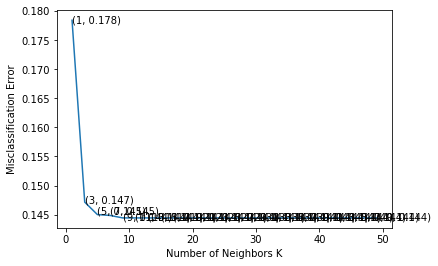

The misclassification error for each k value is :  [0.178 0.147 0.145 0.145 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [10]:
#Knn with Brute force algorithm
#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',n_jobs=-1)
    scores = cross_val_score(knn, train_bow_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [11]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_bow_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_bow_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 9 is 82.900000%


#### KNN with Kd-tree Algorithm


The optimal number of neighbors is 9.


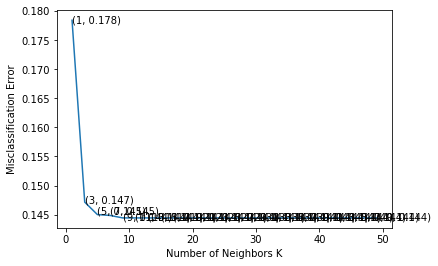

The misclassification error for each k value is :  [0.178 0.147 0.145 0.145 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [12]:
#KNN with kd-tree algorithm
#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
    scores = cross_val_score(knn, train_bow_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [13]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_bow_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_bow_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 9 is 82.900000%


**Observation:**
* Kd_tree based knn is slower than brute force knn because each data point is 300 dimensional.
* The optimal number of neighbors is 21 and Test Acccuracy is 82.9%

### Featurization: Tfidf

#### KNN with Brute Force Algorithm


The optimal number of neighbors is 5.


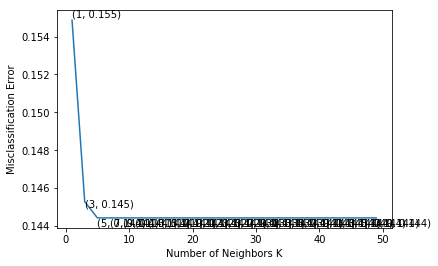

The misclassification error for each k value is :  [0.155 0.145 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [15]:
#KNN with brute force algorithm

#from imblearn.over_sampling import SMOTE
#Oversampling using SMOTE.
#sm = SMOTE(random_state=42)
#X, y = sm.fit_sample(X, y)
#Split the data set into train and test

#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',n_jobs=-1)
    scores = cross_val_score(knn, train_tfidf_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [17]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_tfidf_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_tfidf_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 82.866667%


#### KNN with kd-tree Algorithm


The optimal number of neighbors is 5.


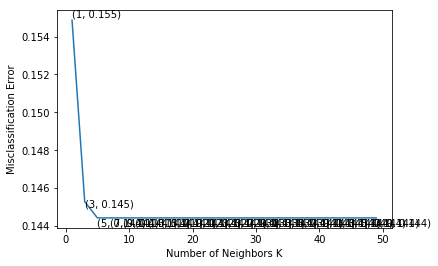

The misclassification error for each k value is :  [0.155 0.145 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [18]:
#KNN with kd-tree algorithm
#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
    scores = cross_val_score(knn, train_tfidf_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [19]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_tfidf_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_tfidf_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 82.866667%


### Featurization: Avg Word2Vec

#### KNN with Brute Force Algorithm


The optimal number of neighbors is 27.


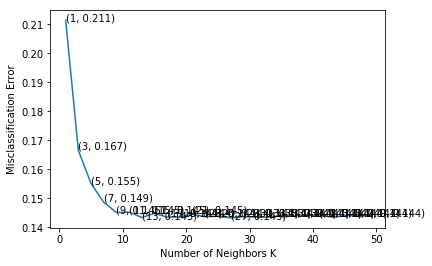

The misclassification error for each k value is :  [0.211 0.167 0.155 0.149 0.145 0.145 0.143 0.145 0.144 0.144 0.145 0.144
 0.144 0.143 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [20]:
#KNN with Brute force algorithm

#from imblearn.over_sampling import SMOTE
#Oversampling using SMOTE.
#sm = SMOTE(random_state=42)
#X, y = sm.fit_sample(X, y)
#Split the data set into train and test

#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',n_jobs=-1)
    scores = cross_val_score(knn, train_avgw2v_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [21]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_avgw2v_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_avgw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 27 is 82.800000%


#### KNN with Kd-Tree Algorithm


The optimal number of neighbors is 27.


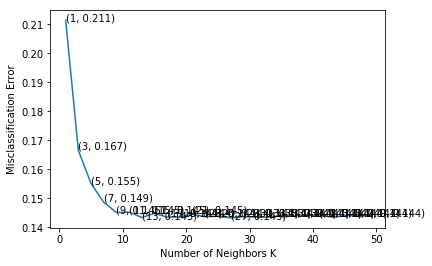

The misclassification error for each k value is :  [0.211 0.167 0.155 0.149 0.145 0.145 0.143 0.145 0.144 0.144 0.145 0.144
 0.144 0.143 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [22]:
#Knn with kd-tree algorithm
#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
    scores = cross_val_score(knn, train_avgw2v_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [23]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_avgw2v_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_avgw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 27 is 82.800000%


### Featurization: Tfidf Weighted Word2Vec

#### KNN with Brute Force Algorithm


The optimal number of neighbors is 19.


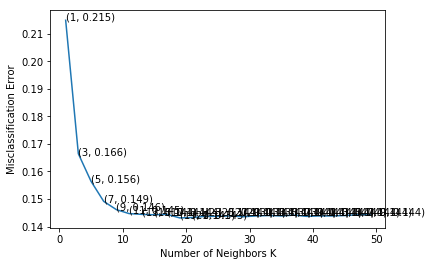

The misclassification error for each k value is :  [0.215 0.166 0.156 0.149 0.146 0.145 0.144 0.144 0.144 0.143 0.143 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [24]:
#KNN with brute force algorithm

#from imblearn.over_sampling import SMOTE
#Oversampling using SMOTE.
#sm = SMOTE(random_state=42)
#X, y = sm.fit_sample(X, y)

#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute',n_jobs=-1)
    scores = cross_val_score(knn, train_tfidfw2v_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("The misclassification error for each k value is : ", np.round(MSE,3))

In [25]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_tfidfw2v_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_tfidfw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 19 is 82.733333%


#### KNN with Kd-Tree Algorithm


The optimal number of neighbors is 19.


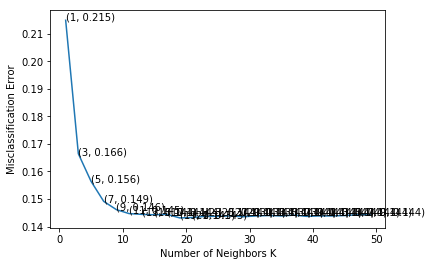

The misclassification error for each k value is :  [0.215 0.166 0.156 0.149 0.146 0.145 0.144 0.144 0.144 0.143 0.143 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [26]:
#Knn with Kd-tree algorithm
#from imblearn.over_sampling import SMOTE
#Oversampling using SMOTE.
#sm = SMOTE(random_state=42)
#X, y = sm.fit_sample(X, y)

#Creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
    scores = cross_val_score(knn, train_tfidfw2v_normalize, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

#Changing to misclassification error
MSE = [1 - x for x in cv_scores]

#Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


print("The misclassification error for each k value is : ", np.round(MSE,3))

In [27]:
#Instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='kd_tree',n_jobs=-1)
#Fitting the model
knn_optimal.fit(train_tfidfw2v_normalize, y_train)
#Predict the response
pred = knn_optimal.predict(test_tfidfw2v_normalize)
#Evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 19 is 82.733333%


#### Observation:

* Bow------------------>k=9------------>Accuracy:82.9%
* Tfidf---------------->k=5------------>Accuracy:82.86%
* Avg Word2Vec--------->k=27----------->Accuracy:82.8%
* Tfidf Word2Vec------->k=19----------->Accuracy:82.73%
* Among all the featurization techniques, we are getting slightly better accuracy with Bow(Bag of words)